<a href="https://colab.research.google.com/github/Josaphat12-tech/Gradient-Descent-For-Neuron-Network/blob/main/House_price_with_Josaphat_JB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
url = r'https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/8_sgd_vs_gd/homeprices_banglore.csv'
df = pd.read_csv(url)

In [70]:
df.sample(5)

,area,bedrooms,price
18,2770,3,102.0
2,1440,3,62.0
15,1175,2,42.0
11,2785,4,140.0
5,1170,2,38.0


scalling consists of rendering all the selected data into a range of 0-1

In [71]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

# trynna scale our x values
scaled_x  = sx.fit_transform(df.drop('price',axis='columns'))        #df.drop('price',axis='columns')

In [72]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [73]:
# Scaling the Y Values as Well
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))             #df['price'].values.reshape(df.shape[0],1)
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [74]:
def batch_gradient_descent(x,y_true,epochs,learning_rate = 0.01):
  number_of_features = x.shape[1]
  w = np.ones(number_of_features)
  b = 0
  total_samples = shape=x.shape[0]
  cost_list = []
  epochs_list = []
  for i in range(epochs):
    y_predicted = np.dot(w,scaled_x.T) + b
    # Here i try to find the derivating of the error by taking y_true - y_predicted then we apply the the dot production wit X TRANSPOSE and at the end i find the mean mupplied by -2
    w_grad = -(2/total_samples) * (x.T.dot(y_true-y_predicted)) 
    b_grad = -(2/total_samples) * np.sum(y_true-y_predicted)
    
    # Here we try to adjust the weight and the bias for our neuron
    w = w-learning_rate * w_grad
    b = b-learning_rate * b_grad

    # Here i find the mean square Error which is my Cost in this use case
    cost =np.mean(np.square(y_true-y_predicted))
    
    # Here i catch the value of cost and epochs after 10 iteration over the i which is an Epoch from for loop above 
    if i%10 ==0:
      cost_list.append(cost)
      epochs_list.append(i)

  return w,b,cost,cost_list,epochs_list

w,b,cost,cost_list,epochs_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

Text(0, 0.5, 'Cost')

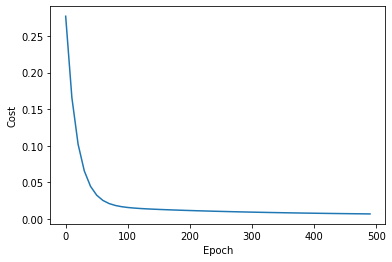

In [75]:
plt.plot(epochs_list,cost_list)
plt.xlabel('Epoch')
plt.ylabel('Cost')

In [76]:
def predict(area,bedrooms,w,b):
  scaled_x = sx.transform([[area,bedrooms]])[0]

  scale_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
  return sy.inverse_transform([[scale_price]])[0][0]     #I just [0][0] cuz it is a multi dimentional array for i wanted only to get the value without any bracket around

predict(2600,4,w,b)

128.45484403267596

In [77]:
predict(2250,3,w,b)

94.16701133317747

In [78]:
# val = predict(225345054,323,w,b)
# round(val)
predict(225345054,323,w,b)

7425184.892652171

#*Let's Implement the stochastic_Gradient_Descent in the Second part**

In [95]:
import random
def stochastic_gradient_descent(x,y_true,epochs,learning_rate = 0.01):
  number_of_features = x.shape[1]
  w = np.ones(number_of_features)
  b = 0
  total_samples = shape=x.shape[0]
  cost_list_sdg = []
  epochs_list_sdg = []
  for i in range(epochs):

    random_index = random.randint(0,total_samples-1)
    sample_x = x[random_index]
    sample_y = y_true[random_index]

    y_predicted = np.dot(w,sample_x.T) + b
    # Here i try to find the derivating of the error by taking y_true - y_predicted then we apply the the dot production wit X TRANSPOSE and at the end i find the mean mupplied by -2
    w_grad = -(2/total_samples) * (sample_x.T.dot(sample_y-y_predicted)) 
    b_grad = -(2/total_samples) * np.sum(sample_y-y_predicted)
    
    # Here we try to adjust the weight and the bias for our neuron
    w = w-learning_rate * w_grad
    b = b-learning_rate * b_grad

    # Here i find the mean square Error which is my Cost in this use case
    cost =np.mean(np.square(sample_y-y_predicted))
    
    # Here i catch the value of cost and epochs after 10 iteration over the i which is an Epoch from for loop above 
    if i%100 ==0:
      cost_list_sdg.append(cost)
      epochs_list_sdg.append(i)

  return w,b,cost,cost_list_sdg,epochs_list_sdg

w1,b1,cost1,cost_list_sdg,epochs_list_sdg = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w1,b1,cost1

(array([0.70524861, 0.67104345]), -0.2266532941415577, 0.006866907514487071)

In [91]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

Text(0, 0.5, 'Cost')

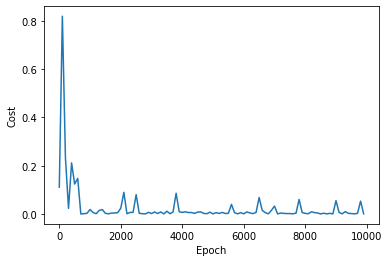

In [93]:
plt.plot(epochs_list_sdg,cost_list_sdg)
plt.xlabel('Epoch')
plt.ylabel('Cost')

In [94]:
predict(2770,3,w1,b1)

110.97479686414064